In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import json
import os
from glob import glob
import numpy as np

In [ ]:
def get_files_in_folder(folder, use_glob=False):
  if use_glob:
    return sorted(glob(os.path.join(folder, "*")))[:30]
  return sorted(os.path.join(folder, f) for f in os.listdir(folder))

In [ ]:
def get_data_from_file(filepaths):
  data = dict()

  for filepath in filepaths:
    file_name_with_ext = os.path.basename(filepath)
    file_name_without_ext = os.path.splitext(file_name_with_ext)[0]

    with open(filepath, "r") as file:
        json_data = json.load(file)

    data[file_name_without_ext] = json_data

  return data

In [ ]:
def extract_figure_info(datafile, numerical=False):
  if (numerical):
      variant_names = sorted(set(result["name"] for result in datafile), key=lambda x: int(x.rstrip("%")))
  else:
      variant_names = sorted(set(result["name"] for result in datafile))
  # algorithm_names = sorted(set(result["algorithm"] for result in datafile))
  algorithm_names = ["Fanchuan", "DounLee", "SeifEddine"]

  scores = ["test_effectiveness_score", "retain_effectiveness_score", "certifiability_score", "combined_test_score"]
  data = {score: {algorithm: [result[score]
                            for variant in variant_names for result in datafile if result["name"] == variant and result["algorithm"] == algorithm]
                  for algorithm in algorithm_names}
          for score in scores}

  return (data, variant_names, algorithm_names)

In [ ]:
def plot_figure(data, variant_names, algorithm_names, trial):
  os.makedirs(os.path.join(ROOT_FOLDER, trial), exist_ok=True)

  for score in data:
      algo_scores = data[score]
      x = np.arange(len(variant_names))  # the label locations
      width = 0.2  # the width of the bars
      multiplier = 0

      fig, ax = plt.subplots(layout='constrained')

      max_score = max([max(scores) for scores in algo_scores.values()])
      min_score = min([min(scores) for scores in algo_scores.values()])

      ylim_margin = 0.005  # Add some margin to the y-axis limits
      ax.set_ylim(min_score - ylim_margin, max_score + ylim_margin)
      plt.yscale("log")

      for algorithm, scores in algo_scores.items():
          offset = width * multiplier
          rects = ax.bar(x + offset, scores, width, label=algorithm)
          # ax.bar_label(rects, padding=3)
          multiplier += 1

      # Add some text for labels, title and custom x-axis tick labels, etc.
      ax.set_ylabel(score)
      ax.set_xticks(x + width, variant_names)
      ax.legend(loc='upper left', ncols=3)

      ax.yaxis.grid(linestyle='dashed', which = 'minor')
      plt.savefig(os.path.join(ROOT_FOLDER, f"{trial}/{score}_comparison.png"))
      plt.show()

In [ ]:
ROOT_FOLDER = "/content/drive/MyDrive/CSC413/Project/"
json_files = get_files_in_folder(os.path.join(ROOT_FOLDER, "Results/"))

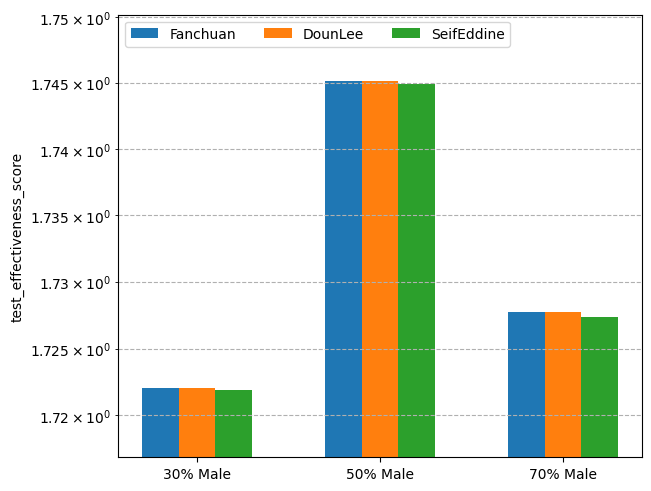

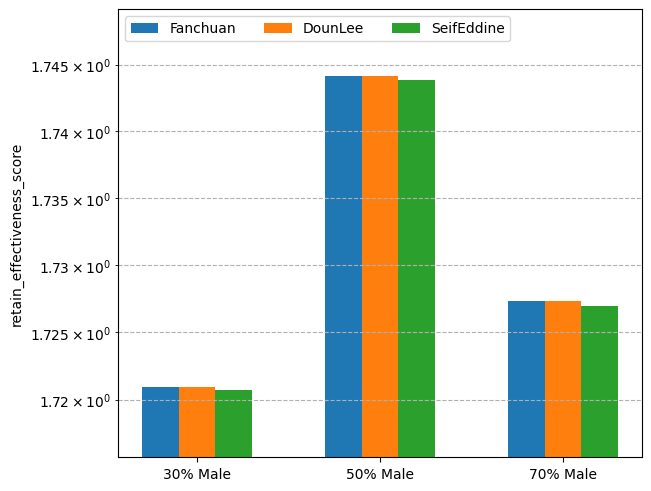

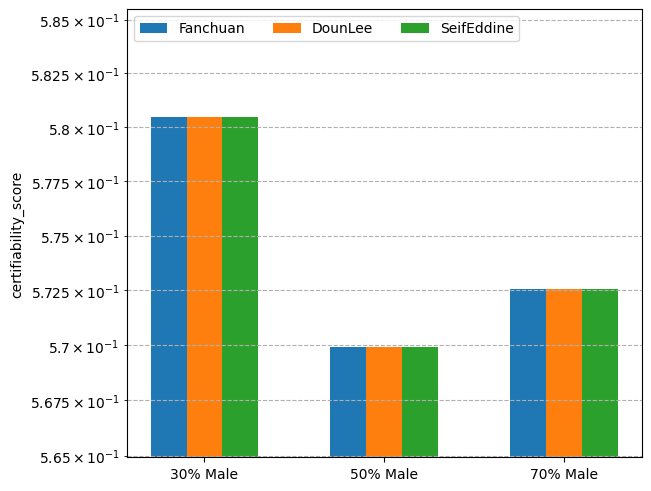

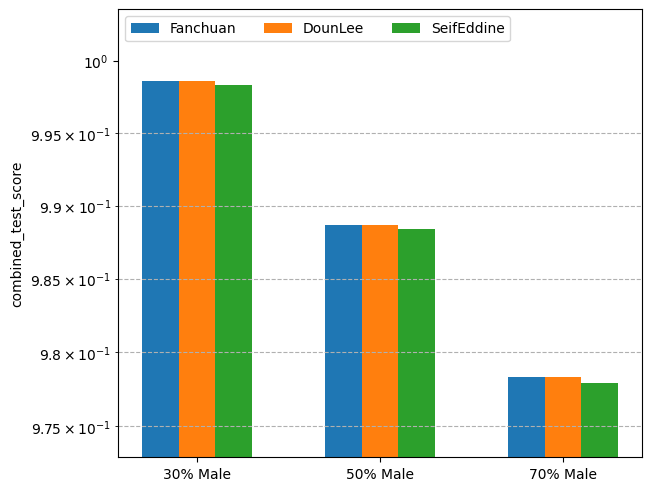

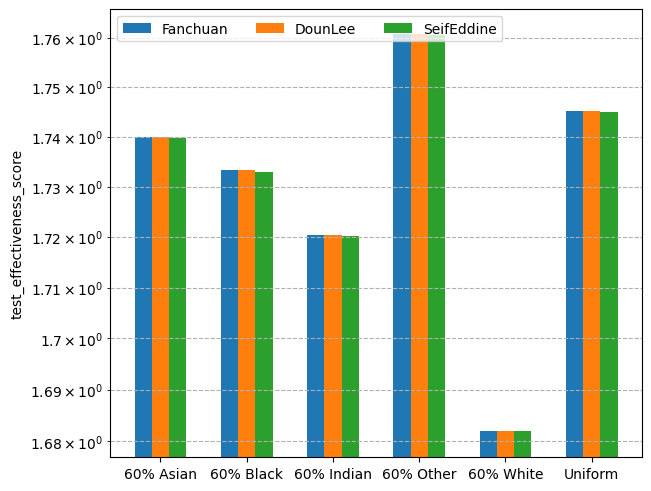

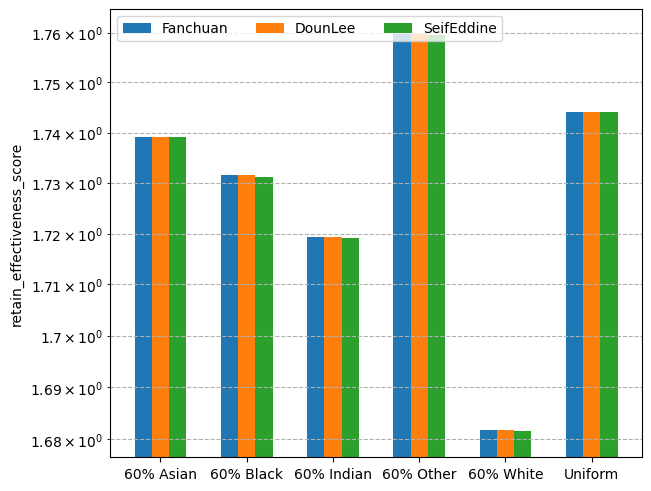

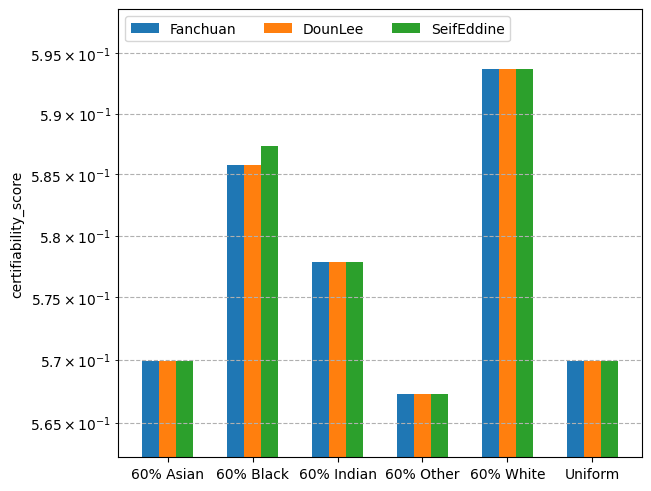

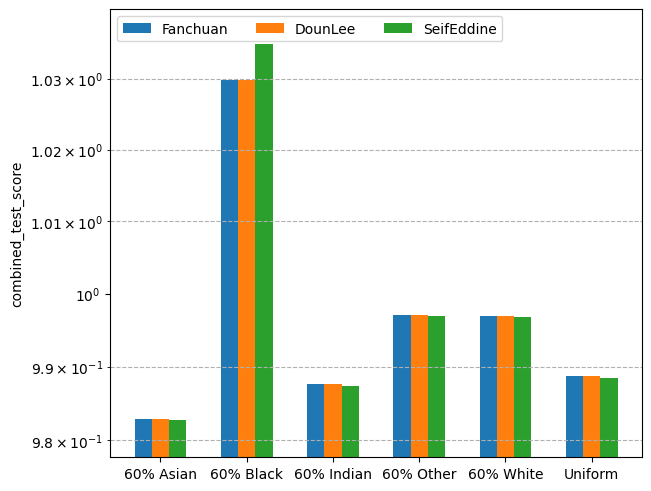

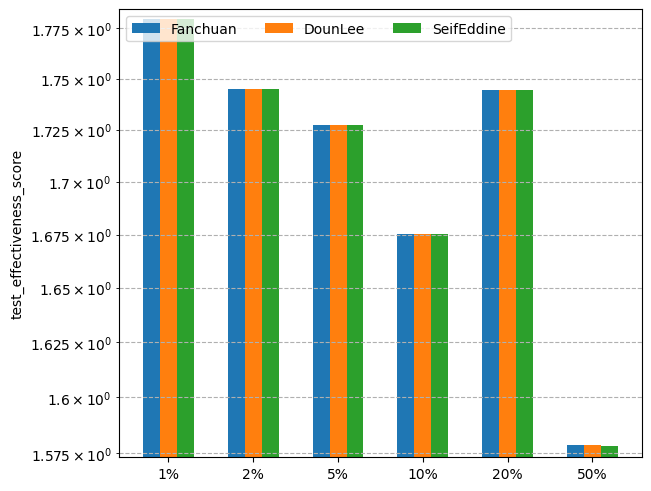

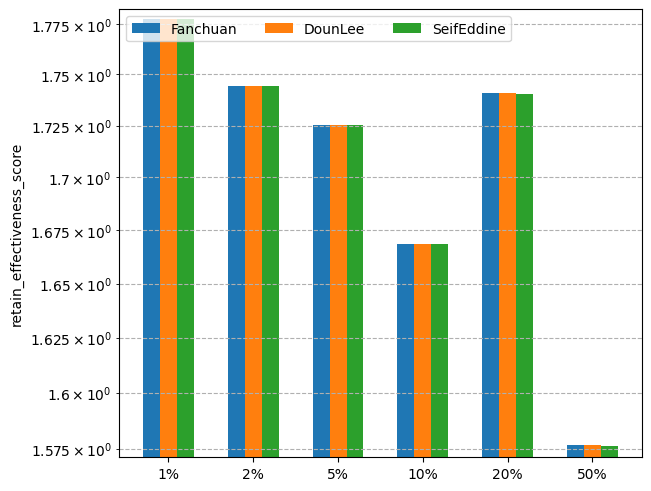

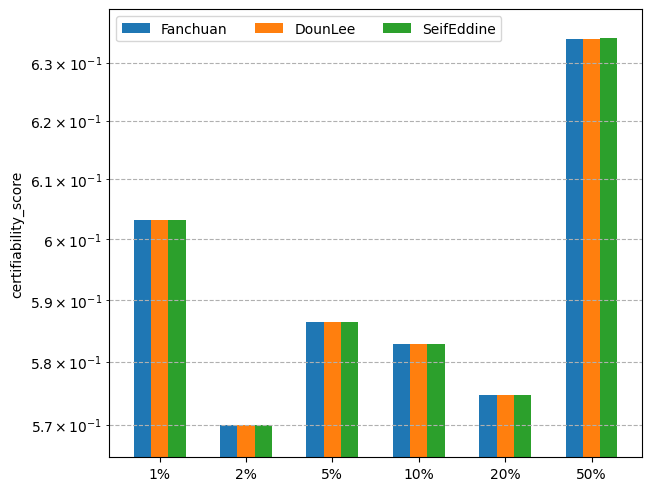

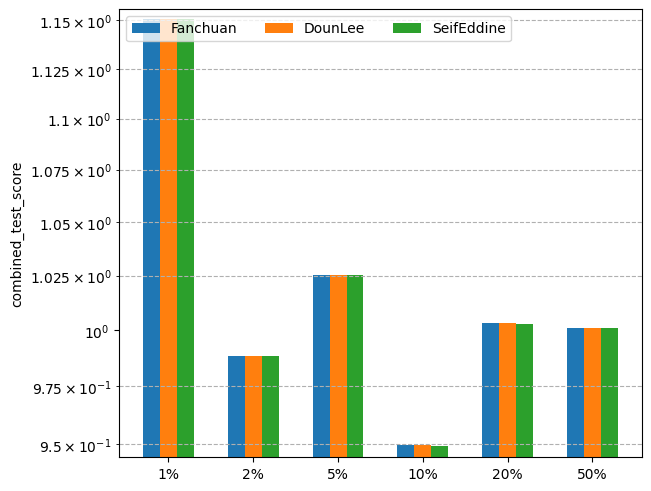

In [ ]:
jsondata = get_data_from_file(json_files)

for trial in jsondata:
  trial_jsondata = jsondata[trial]
  data, variant_names, algorithm_names = extract_figure_info(trial_jsondata, trial == "size_results")
  plot_figure(data, variant_names, algorithm_names, trial)